# Assignment 6: Mushroom Classification

## DTSC-680: Applied Machine Learning (Final)

## Name: Meheryn Hossain

In this assignment, the goal is to build a Machine Learning model that predicts if a mushroom is edible (e) or poisonous (p) based on the various physical characteristics. Please follow the steps below:
1. Load the Dataset and Explore the Data
2. Assign Column Headers using .names file
3. Preprocessing:
* Split the data (80% Training/ 20% Testing)
* Label Encode the responses (target variable)
* One-Hot Encode the features
4. Build a Neural Network:
* Create a sequential neural network medel with two layers: input layer and output layer.
5. Train the model using training data & Use magic command for time training. 
6. Evaluate Model Performance:
* Use Scikit Learn's ConfusionMatrixDisplay
7. Perform Dimensionality Reduction using PCA (95% variance)
8. Created and Train a Second Neural Network on PCA- tranformed data:
* Use magic command %%time or %time for time training.
9. Final Evaluation:
* Use Scikit Learn's ConfusionMatrixDisplay on New Network.


Additional Information: 
* You will be working with the mushroom dataset included in Brightspace.
* The first column in the dataset contains a ‘p’ or an ‘e’ indicating if the mushroom represented by that row is poisonous or edible.

In [1]:
# Imports
import pandas as pd
import numpy as np

# 1. Use the information provided in the .names file to properly assign column headers.

In [2]:
# Load dataset and Evalaute 
df = pd.read_csv('agaricus-lepiota.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
# Assign Column Headers/Names - using .names file. **previous code shows 23 columns = 23 column headers AND note that 1st column in data set is class (p or e).

column_names = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 
                'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 
                'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type',
                'spore-print-color', 'population', 'habitat']

df.columns = column_names
df.info()   ## show dataset information


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
## check for missing values
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# 2. Split the data. 80% of the data should be for training and 20% should be for testing. 

In [5]:
# Split the Data (80% training, 20% testing)
## separate the data into features and responses:
from sklearn.model_selection import train_test_split

x = df.drop('class', axis=1)  #features
y = df['class']               #labels

## split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0) ##use stratify=y for classification tasks


# 3. One-Hot Encode the features and Label Encode the responses of the training data. 

In [6]:
# One-Hot Encode the Categorical features
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
x_train_encoded = encoder.fit_transform(x_train)
x_test_encoded = encoder.transform(x_test)

# Label Encode the Responses (Target)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  ## label encodes class: edible(e) = 0, poisonousp(p) = 1
y_test_encoded = label_encoder.transform(y_test)

##fit_transform for Training sets and transform for Test set

In [7]:
##get the number of input features
input_dim = x_train_encoded.shape[1]
input_dim 

116

# 4. Create a sequential neural network model for prediction on this data with two layers: an input layer and an output layer.

In [8]:
# Build and Train a Sequential Neural Network with 2 layers: input layer and output layer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential() 
model.add(Dense(128, activation='relu'))     #input layer
model.add(Dense(1, activation='sigmoid'))  #output layer (binary classification)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])   ##compile the model


# 5. Train the model using the training data. Use the magic command %%time ot %time to time how long it takes to complete training.

In [9]:
# Train the Model AND use magic command %%time or %time for Time Training
%time
hist = model.fit(x_train_encoded, y_train_encoded, validation_split=0.2, epochs=10, batch_size=100)


CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 2.15 µs
Epoch 1/10
 1/52 [..............................] - ETA: 8s - loss: 0.6991 - accuracy: 0.5300

2025-11-08 18:35:20.825865: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


52/52 [==============================] - 0s 2ms/step - loss: 0.3199 - accuracy: 0.8938 - val_loss: 0.1194 - val_accuracy: 0.9723
Epoch 2/10
52/52 [==============================] - 0s 551us/step - loss: 0.0723 - accuracy: 0.9842 - val_loss: 0.0419 - val_accuracy: 0.9969
Epoch 3/10
52/52 [==============================] - 0s 508us/step - loss: 0.0285 - accuracy: 0.9971 - val_loss: 0.0208 - val_accuracy: 0.9985
Epoch 4/10
52/52 [==============================] - 0s 551us/step - loss: 0.0147 - accuracy: 0.9994 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 5/10
52/52 [==============================] - 0s 564us/step - loss: 0.0088 - accuracy: 0.9998 - val_loss: 0.0077 - val_accuracy: 1.0000
Epoch 6/10
52/52 [==============================] - 0s 567us/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 7/10
52/52 [==============================] - 0s 556us/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 8/10
52/52 [=

# 6. Use a Scikit Learn's ConfusionMatrixDisplay to analyze the results of the network. 

51/51 [==============================] - 0s 216us/step
Accuracy: 0.9994
Recall: 0.9987
F1 Score: 0.9994
Precision: 1.0000


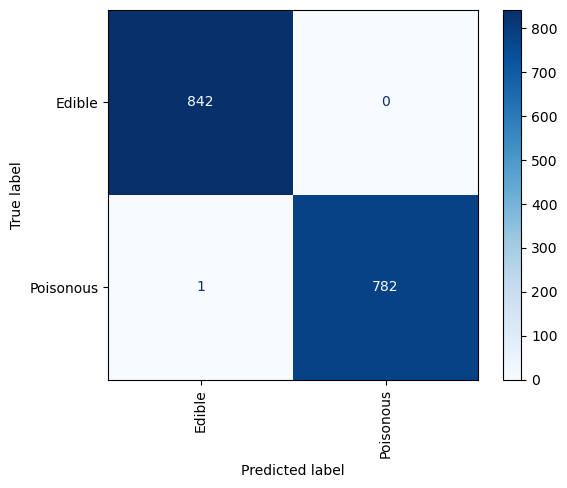

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, ConfusionMatrixDisplay
import seaborn as sns

sns.reset_orig()

# Predict on the test (encoded) data
y_predicted = model.predict(x_test_encoded) > 0.5

# Evaluate performance
accuracy = accuracy_score(y_test_encoded, y_predicted)
recall = recall_score(y_test_encoded, y_predicted)
f1 = f1_score(y_test_encoded, y_predicted)
precision = precision_score(y_test_encoded, y_predicted)

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")

# Show the confusion matrix
labels = ['Edible', 'Poisonous']
cmd.from_predictions(y_test_encoded, y_predicted, display_labels=labels, cmap='Blues', xticks_rotation='vertical')

# 7. Perform dimensionality reduction using PCA and keep 95% of the variance. 

In [11]:
# Perform dimensionality reduction using PCA and keep 95% of the variance.
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95, random_state=0)
x_train_pca = pca.fit_transform(x_train_encoded)
x_test_pca = pca.transform(x_test_encoded)

#outputs number of components remaining
pca.n_components_ 

40

In [12]:
input_dim = x_train_pca.shape[1]
input_dim

40

# 8. Create and train a new neural network on the PCA’ed data. Use the %%time command during training. 

In [13]:
# Create and train a new neural network on the PCA’ed data. Use the %%time command during training
model_pca = Sequential() 
model_pca.add(Dense(128, activation='relu'))    #input layer
model_pca.add(Dense(1, activation='sigmoid'))  #output layer (binary classification)
model_pca.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])   ##compile the model


In [14]:
# Train the Model AND use magic command %%time or %time for Time Training
%time      
hist_pca = model_pca.fit(x_train_pca, y_train_encoded,validation_split=0.2, epochs=10, batch_size=100)

CPU times: user 1 µs, sys: 1 µs, total: 2 µs
Wall time: 3.1 µs
Epoch 1/10
52/52 [==============================] - 0s 1ms/step - loss: 0.4533 - accuracy: 0.9000 - val_loss: 0.2620 - val_accuracy: 0.9838
Epoch 2/10
52/52 [==============================] - 0s 552us/step - loss: 0.1719 - accuracy: 0.9842 - val_loss: 0.1103 - val_accuracy: 0.9854
Epoch 3/10
52/52 [==============================] - 0s 516us/step - loss: 0.0825 - accuracy: 0.9875 - val_loss: 0.0617 - val_accuracy: 0.9900
Epoch 4/10
52/52 [==============================] - 0s 503us/step - loss: 0.0496 - accuracy: 0.9910 - val_loss: 0.0402 - val_accuracy: 0.9962
Epoch 5/10
52/52 [==============================] - 0s 491us/step - loss: 0.0335 - accuracy: 0.9956 - val_loss: 0.0284 - val_accuracy: 0.9985
Epoch 6/10
52/52 [==============================] - 0s 497us/step - loss: 0.0242 - accuracy: 0.9979 - val_loss: 0.0211 - val_accuracy: 0.9992
Epoch 7/10
52/52 [==============================] - 0s 489us/step - loss: 0.0183 - accu

# 9. Final Evaluation: Use Scikit Learn's ConfusionMatrixDisplay to analyze the results of the new network. 

51/51 [==============================] - 0s 217us/step
Accuracy: 0.9994
Recall: 0.9987
F1 Score: 0.9994
Precision: 1.0000


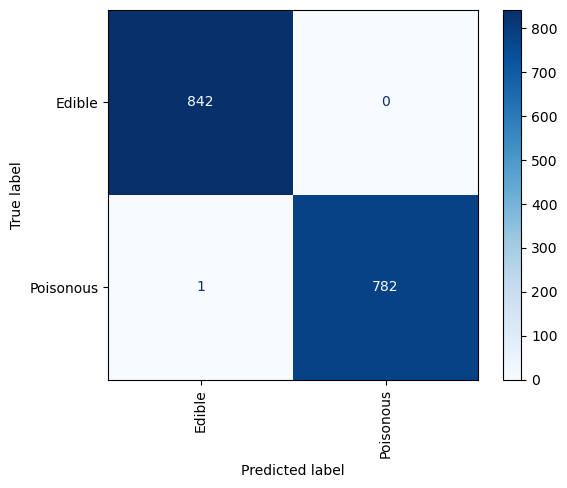

In [15]:
# Use Scikit Learn's ConfusionMatrixDisplay to analyze the results of the new network
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, ConfusionMatrixDisplay
import seaborn as sns

#sns.reset_orig()

# Predict on the test (PCA transformed data)
y_pred_pca = model_pca.predict(x_test_pca) > 0.5


# Evaluate performance
accuracy = accuracy_score(y_test_encoded, y_pred_pca)
recall = recall_score(y_test_encoded, y_pred_pca)
f1 = f1_score(y_test_encoded, y_pred_pca)
precision = precision_score(y_test_encoded, y_pred_pca)

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")

# Show the confusion matrix
cmd.from_predictions(y_test_encoded, y_pred_pca, display_labels=labels, cmap='Blues', xticks_rotation='vertical')


# See Additional code below to help with Concept Questions:

In [16]:
# No. of features after One-Hot Encoding
x_train_encoded.shape[1]

116

In [17]:
# No. of features before One-Hot Encoding
x.shape[1]

22

In [18]:
# No. of connections in 1st neural network (model): number of trainable parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               14976     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 15,105
Trainable params: 15,105
Non-trainable params: 0
_________________________________________________________________


In [19]:
# No. of connections in 2nd neural network (model_pca): number of trainable parameters
model_pca.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               5248      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 5,377
Trainable params: 5,377
Non-trainable params: 0
_________________________________________________________________


In [20]:
# No. of features after PCA
x_train_pca.shape[1]

40

# 10. Concept Questions: (see codes above for more information)
a. How many features does the data have after the One-Hot Encoding? **116 Features**  
How does this compare to the number of features that the data had before the encoding? **The number of features before One-Hot Encoding is 22 features. We notice that after One-Hot Encoding, the number of features increased to 116 features because each categorical feature was expanded into multiple binary columns.**

b. What should the units parameter of the output layer in the network be and why? **The output layer should have 1 unit with sigmoid activation because we are doing binary classification (edible vs poisonous).**

c. How many connections does your neural network contain? **For the 1st neural network model there were 15,105 connections and for the 2nd neural network model_pca there were 5,377 connections.**

d. How many features does the training data contain after dimensionality reduction? How does this compare with the encoded data? **After the dimensionality reduction of the training data there were 40 features compared to 116 features with the encoded data. PCA reduced the dimensionality while retaining 95% variance.**

e. Why does the input_dim parameter of the first layer need to change from the previous neural network? **The input shape has changed since PCA reduced the number of features. The input_dim in the first layer needs to match the shape of your input data.**

f. Compare the training time of the original neural network with the training time of the PCA neural network. Are the results what you expected?
**After PCA was applied, the training time of the neural network decreased. This is something I expected because the number of features were reduced from 116 (after One-Hot Encoding) to 40 (after PCA, 95% variance). This led to fewer trainable parameters in the model 5377 vs 15105.**


### Export PCA Model
Export the PCA model using model.save(“filepath”)

In [21]:
model_pca.save("mushroom_pca_model.h5")